Introduction:

The data provided contains two datasets: one detailing the geographical information of polling units (PU) in Akwa Ibom (including latitude, longitude, and addresses), and the other focusing on election results from the 2023 Akwa Ibom elections.

The goal is to:
 1. Identify areas with the highest and lowest voter turnout across polling units in Akwa Ibom.
 2. Investigate the factors contributing to low voter turnout in specific LGAs or polling units.
 3. Provide data-driven recommendations to improve voter turnout in future elections.



In [2]:
import pandas as pd
election=pd.read_csv("AKWA IBOM_2023 Election.csv")
election

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,Result_Sheet_Corrected,Result_Sheet_Invalid,Result_Sheet_Unclear,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,Results_File
0,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-001,"VILLAGE SQUARE, IKOT AKWA EBOM",179,750,True,-1,False,False,False,False,UNKNOWN,0,0,0,0,https://docs.inecelectionresults.net/elections...
1,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-003,"PRY SCH, IKOT OKU UBARA",190,833,True,-1,False,False,False,False,UNKNOWN,0,0,0,0,https://docs.inecelectionresults.net/elections...
2,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-005,"VILLAGE SQUARE, ATAI EDIENE",140,750,True,-1,False,False,False,False,UNKNOWN,8,21,30,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
3,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-006,PRY SCH IBANANG EDIENE,210,750,True,-1,False,False,False,False,UNKNOWN,105,45,43,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
4,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-007,"VILLAGE HALL, IKOT UDOUSUNG",131,542,True,-1,False,False,False,False,UNKNOWN,37,27,57,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3974,AKWA IBOM,UYO,UYO URBAN 111,03-31-03-048,"OPEN SPACE DAVOK SUITE, HOUSING ESTATE EWET",56,102,True,-1,False,False,False,False,UNKNOWN,3,50,3,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
3975,AKWA IBOM,UYO,UYO URBAN 111,03-31-03-049,"OPEN SPACE PLOT 1, G-LINE, HOUSING ESTATE EWET.",154,619,True,-1,False,False,False,False,UNKNOWN,12,115,18,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
3976,AKWA IBOM,UYO,UYO URBAN 111,03-31-03-050,"OPEN SPACE BEN UDOH, BY F-LINE HOUSING ESTATE ...",254,702,True,-1,False,False,False,False,UNKNOWN,9,216,10,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
3977,AKWA IBOM,UYO,UYO URBAN 111,03-31-03-051,"OPEN SPACE, G-LINE PLOT 48, HOUSING ESTATE EWET",170,750,True,-1,True,False,False,False,UNKNOWN,8,128,12,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....


# Data-Driven Analysis and Insights

In [4]:
# Dat Cleaning Process
election.dtypes

State                     object
LGA                       object
Ward                      object
PU-Code                   object
PU-Name                   object
Accredited_Voters          int64
Registered_Voters          int64
Results_Found               bool
Transcription_Count        int64
Result_Sheet_Stamped        bool
Result_Sheet_Corrected      bool
Result_Sheet_Invalid        bool
Result_Sheet_Unclear        bool
Result_Sheet_Unsigned     object
APC                        int64
LP                         int64
PDP                        int64
NNPP                       int64
Results_File              object
dtype: object

In [5]:
#Removing unneccessary columns
new_ibom=election.drop(columns=["Transcription_Count","Result_Sheet_Stamped","Result_Sheet_Corrected","Result_Sheet_Invalid","Result_Sheet_Unclear","Result_Sheet_Unsigned","Results_File"])

In [6]:
#viewing the first 5 columns
new_ibom.head()

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,APC,LP,PDP,NNPP
0,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-001,"VILLAGE SQUARE, IKOT AKWA EBOM",179,750,True,0,0,0,0
1,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-003,"PRY SCH, IKOT OKU UBARA",190,833,True,0,0,0,0
2,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-005,"VILLAGE SQUARE, ATAI EDIENE",140,750,True,8,21,30,1
3,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-006,PRY SCH IBANANG EDIENE,210,750,True,105,45,43,0
4,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-007,"VILLAGE HALL, IKOT UDOUSUNG",131,542,True,37,27,57,1


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
#checking for nans
new_ibom.isna().sum()

State                0
LGA                  0
Ward                 0
PU-Code              0
PU-Name              0
Accredited_Voters    0
Registered_Voters    0
Results_Found        0
APC                  0
LP                   0
PDP                  0
NNPP                 0
dtype: int64

In [9]:
new_ibom.fillna(0,inplace=True)

In [ ]:
#removing duplicates
new_ibom.drop_duplicates()

In [11]:
new_ibom.columns = new_ibom.columns.str.upper()

In [12]:
new_ibom.shape

(3979, 12)

In [13]:
new_ibom.tail()

,STATE,LGA,WARD,PU-CODE,PU-NAME,ACCREDITED_VOTERS,REGISTERED_VOTERS,RESULTS_FOUND,APC,LP,PDP,NNPP
3974,AKWA IBOM,UYO,UYO URBAN 111,03-31-03-048,"OPEN SPACE DAVOK SUITE, HOUSING ESTATE EWET",56,102,True,3,50,3,0
3975,AKWA IBOM,UYO,UYO URBAN 111,03-31-03-049,"OPEN SPACE PLOT 1, G-LINE, HOUSING ESTATE EWET.",154,619,True,12,115,18,0
3976,AKWA IBOM,UYO,UYO URBAN 111,03-31-03-050,"OPEN SPACE BEN UDOH, BY F-LINE HOUSING ESTATE ...",254,702,True,9,216,10,1
3977,AKWA IBOM,UYO,UYO URBAN 111,03-31-03-051,"OPEN SPACE, G-LINE PLOT 48, HOUSING ESTATE EWET",170,750,True,8,128,12,0
3978,AKWA IBOM,INI,IKPE 11,03-15-02-013,Ini secondary school Ikpe Ikot Okon,131,467,True,4,15,96,0


In [14]:
new_ibom.dtypes

STATE                object
LGA                  object
WARD                 object
PU-CODE              object
PU-NAME              object
ACCREDITED_VOTERS     int64
REGISTERED_VOTERS     int64
RESULTS_FOUND          bool
APC                   int64
LP                    int64
PDP                   int64
NNPP                  int64
dtype: object

In [15]:
#creating a new column total votes and Calculating total votes by summing across the relevant columns
new_ibom["TOTAL_VOTES"] = new_ibom[["APC","LP","PDP","NNPP"]].sum(axis=1)

In [16]:
new_ibom[["APC","LP","PDP","NNPP","TOTAL_VOTES"]].head()

,APC,LP,PDP,NNPP,TOTAL_VOTES
0,0,0,0,0,0
1,0,0,0,0,0
2,8,21,30,1,60
3,105,45,43,0,193
4,37,27,57,1,122


In [17]:
new_ibom.head()

,STATE,LGA,WARD,PU-CODE,PU-NAME,ACCREDITED_VOTERS,REGISTERED_VOTERS,RESULTS_FOUND,APC,LP,PDP,NNPP,TOTAL_VOTES
0,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-001,"VILLAGE SQUARE, IKOT AKWA EBOM",179,750,True,0,0,0,0,0
1,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-003,"PRY SCH, IKOT OKU UBARA",190,833,True,0,0,0,0,0
2,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-005,"VILLAGE SQUARE, ATAI EDIENE",140,750,True,8,21,30,1,60
3,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-006,PRY SCH IBANANG EDIENE,210,750,True,105,45,43,0,193
4,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-007,"VILLAGE HALL, IKOT UDOUSUNG",131,542,True,37,27,57,1,122


# Using PLOTLY EXPRESS

In [19]:
import plotly.express as px
import matplotlib.pyplot as plt

In [20]:
#calculating voters turnout as a percentage of registered voters for each polling unit.
new_ibom["VOTER_TURNOUT"] = (new_ibom["ACCREDITED_VOTERS"] / new_ibom["REGISTERED_VOTERS"]) * 100

 Voter turnout is a key metric to analyze.This was calculated by dividing the numbers of accredited voters by the number of registered voters at each polling unit.This creates a new column "VOTER TURNOUT" that represent the percentange of registered voters who were accredited to vote.

In [22]:
# Identifying LGAs with the highest and lowest voter turnout

highest_turnout = new_ibom.nlargest(5, "VOTER_TURNOUT")
lowest_turnout = new_ibom.nsmallest(5, "VOTER_TURNOUT")

print("Highest Voter Turnout LGAs:")
print(highest_turnout)

print("\nLowest Voter Turnout LGAs:")
print(lowest_turnout)

Highest Voter Turnout LGAs:
          STATE          LGA              WARD       PU-CODE  \
3770  AKWA IBOM          UYO            ETOI 1  03-31-04-043   
3125  AKWA IBOM          IKA          URBAN 11  03-11-02-007   
2932  AKWA IBOM  ESSIEN UDIM     UKANA WEST 11  03-05-11-019   
3136  AKWA IBOM        IKONO       IKONO SOUTH  03-12-05-024   
3141  AKWA IBOM        IKONO  NDIYA/IKOT IDAHA  03-12-08-022   

                                       PU-NAME  ACCREDITED_VOTERS  \
3770    OPEN SPACE USUNG USE BY ARCHIBONG STR.                 79   
3125                 VILLAGE SQUARE IKOT UKANA                 71   
2932                    VILLAGE HALL, NTO EKON                140   
3136  OPEN SPACE NEAR  VILLAGE HALL, UKPOM ITA                 91   
3141               OPEN SPACE, IKOT AKPA EKPUK                 81   

      REGISTERED_VOTERS  RESULTS_FOUND  APC  LP  PDP  NNPP  TOTAL_VOTES  \
3770                 90           True   10   6   46     5           67   
3125                 8

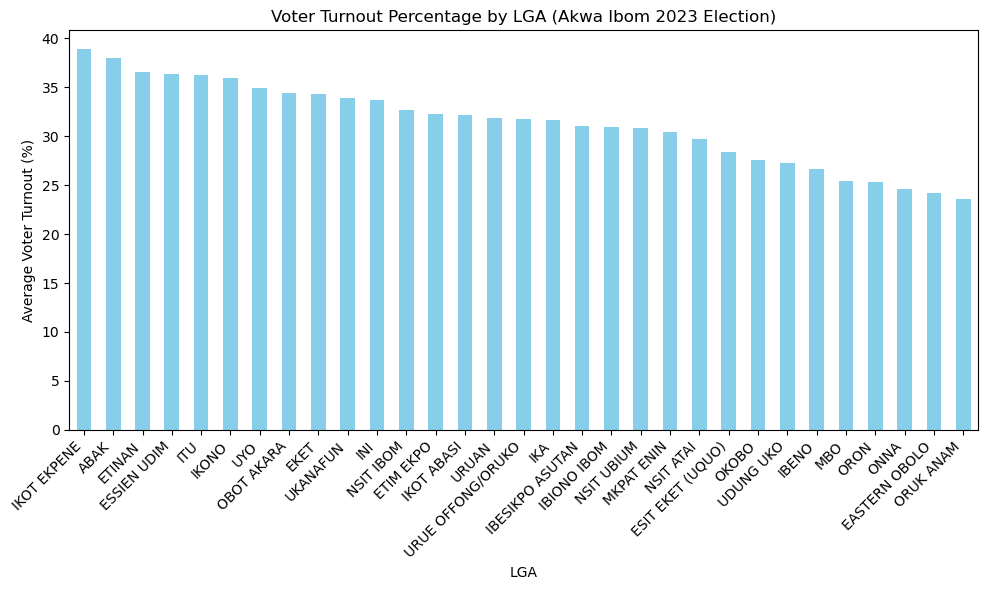

In [23]:
#Grouping the data by LGA and Ward to calculate average turnout by LGA
lga_turnout = new_ibom.groupby("LGA")["VOTER_TURNOUT"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
lga_turnout.plot(kind="bar", color="skyblue")
plt.title("Voter Turnout Percentage by LGA (Akwa Ibom 2023 Election)")
plt.xlabel("LGA")
plt.ylabel("Average Voter Turnout (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

The above bar chart shows the average voter turnout percentage by LGA for the 2023 election in Akwa Ibom. 
The top 5 polling units with the highest voter turnout show percentages ranging from 85% to nearly 88%. For example, the polling unit “OPEN SPACE USUNG USE BY ARCHIBONG STR.” had a voter turnout of 87.78%. Some LGAs had a higher turnout than others, which could indicate varying levels of voter engagement or election day issues accross the regions.


In [25]:
#group by PU-Name and sum of the total votes for each party
party_performance = new_ibom.groupby(["LGA","PU-NAME",])[["APC", "LP", "PDP", "NNPP"]].sum().reset_index()

# Sort and visualize
party_performance = party_performance.sort_values(by=["APC", "LP", "PDP", "NNPP"], ascending=False)
party_performance.head()

,LGA,PU-NAME,APC,LP,PDP,NNPP
486,ESSIEN UDIM,"INDEPENDENCE HIGH SCH, UKANA IKOT NTUEN",324,59,7,0
36,ABAK,"PRY SCH, ATAI OTORO",262,101,132,2
764,ETINAN,"DIVISIONAL LIBRARY, STADIUM ROAD, ETINAN",253,288,466,13
847,ETINAN,"VILLAGE HALL, ISHIET ERONG",241,242,527,6
625,ESSIEN UDIM,"VILLAGE SQUARE, IKOT ANDEM",237,33,40,0


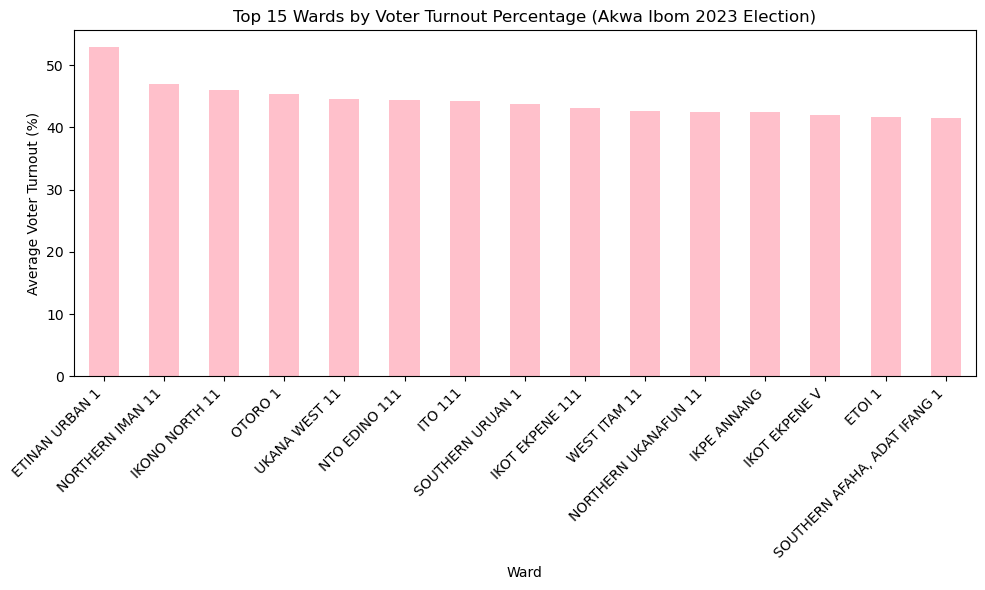

In [26]:
# Group by Ward and calculate mean voter turnout percentage
ward_turnout = new_ibom.groupby("WARD")["VOTER_TURNOUT"].mean().sort_values(ascending=False)

# Plot voter turnout by Ward
plt.figure(figsize=(10, 6))
ward_turnout.head(15).plot(kind="bar", color="pink")  # Top 15 wards
plt.title("Top 15 Wards by Voter Turnout Percentage (Akwa Ibom 2023 Election)")
plt.xlabel("Ward")
plt.ylabel("Average Voter Turnout (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# The Top 3 performing polling units are:

1. Independence High Sch, Ukana Ikot Ntuen in Essien Udim Local Government,
2. Atai Otoro Pry Sch in Abak Local Government, and
3. Divisional library,stadium road,Etinan, in Etinan Local Government

# Party Performance Analysis

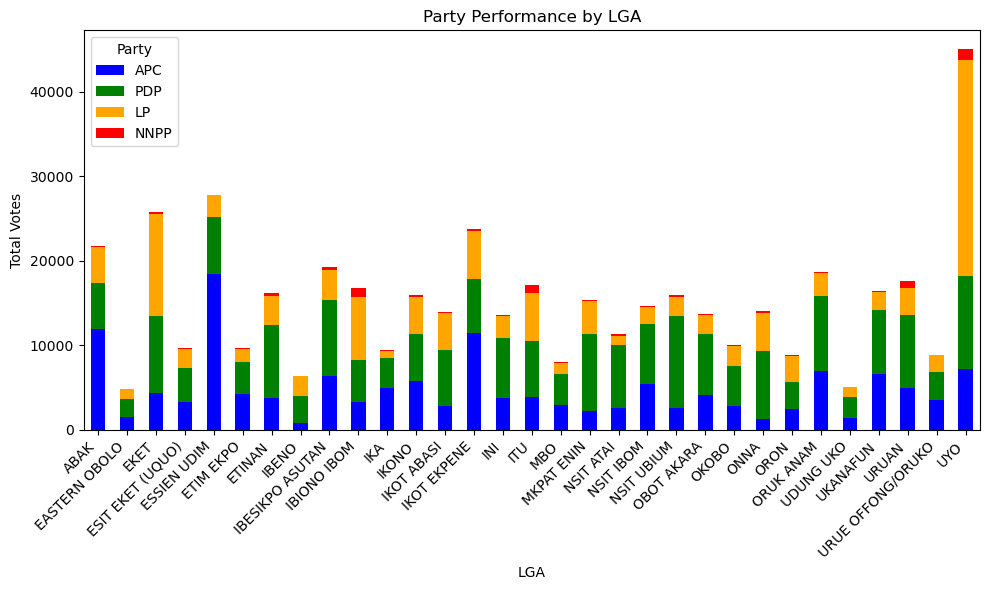

In [29]:
#group by LGA and sum of the total votes for each party
party_votes_by_lga = new_ibom.groupby("LGA")[["APC", "PDP", "LP", "NNPP"]].sum()

party_votes_by_lga.plot(kind="bar", stacked=True, figsize=(10, 6),
                        color=["blue", "green", "orange", "red"])
plt.title("Party Performance by LGA")
plt.xlabel("LGA")
plt.ylabel("Total Votes")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Party")
plt.tight_layout()
plt.show()

# This shows performances of political parties across the LGA"s. As seen on the stacked bar chart above;
-  PDP received the highest total votes across all polling units, with 222,440 votes.
-	APC followed with 157,783 votes.
-	LP secured 143,464 votes,
-	while NNPP had 8,824 votes


# Vote Disribution

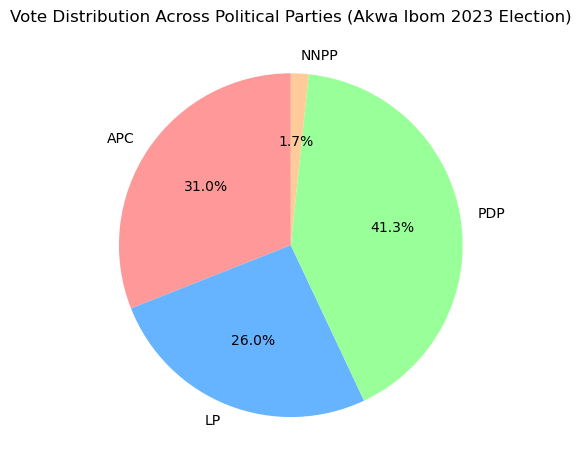

In [32]:
#Party vote distribution
# Summing the votes for each party across all polling units
party_votes = new_ibom[["APC", "LP", "PDP", "NNPP"]].sum()

party_votes.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["#FF9999", "#66B3FF", "#99FF99", "#FFCC99"])
plt.title("Vote Distribution Across Political Parties (Akwa Ibom 2023 Election)")
plt.ylabel('')  # Hides the y-label for better visualization
plt.tight_layout()
plt.show()

The pie chart illustrates the vote distribution among the four main political parties (APC, LP, PDP, NNPP) in the 2023 Akwa Ibom election. It shows how each party fared, with some parties receiving a larger share of votes compared to others.

From the pie chart above, it's easy to see why these polling units are outliers. Taking the parties one after the other:

1. PDP : From the distribution ,PDP has around 41.3% of votes, with maximum votes being around 196,456 in value across diffrent local Govrnments.
Clearly making these polling units outliers.
   
2. APC : From the distribution , APC has around 31%, with median vote being around 147,360 in values across diffrent local Govrnments. 

3. LP : For this party, LP has around is 26%, with minimum votes being around 123,622 votes in values across diffrent local Govrnments.

4. NNPP : In this clutter, NNPP has the least votes of 1.66% in majority of the polling units.

In [34]:
new_ibom.dtypes

STATE                 object
LGA                   object
WARD                  object
PU-CODE               object
PU-NAME               object
ACCREDITED_VOTERS      int64
REGISTERED_VOTERS      int64
RESULTS_FOUND           bool
APC                    int64
LP                     int64
PDP                    int64
NNPP                   int64
TOTAL_VOTES            int64
VOTER_TURNOUT        float64
dtype: object

# Voter Apathy vs Engagement

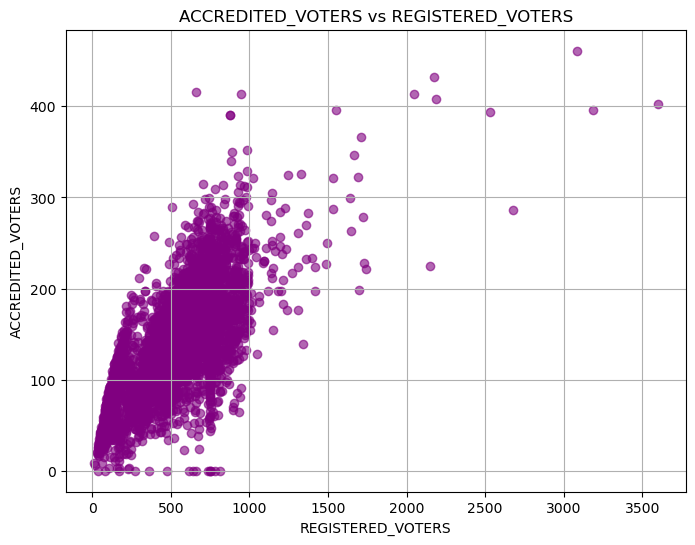

In [36]:
# Creating a scatter plot to compare Accredited vs Registered Voters
plt.figure(figsize=(8, 6))
plt.scatter(new_ibom["REGISTERED_VOTERS"], new_ibom["ACCREDITED_VOTERS"], alpha=0.6, color='purple')
plt.title("ACCREDITED_VOTERS vs REGISTERED_VOTERS")
plt.xlabel("REGISTERED_VOTERS")
plt.ylabel("ACCREDITED_VOTERS")
plt.grid(True)
plt.show()

 This plot visualizes the relationship between the number of registered voters and the number of accredited voters, with each point representing a different data entry. it shows any patterns between voter turnout and the size of polling units.

In [38]:
lat_long = pd.read_csv("Latitude and longtitude.csv")
lat_long.head()

,State,LGA,Ward,PU-Name,Full Address,Latitude,Longtitude,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,AKWA IBOM,ABAK,ABAK URBAN 1,"VILLAGE SQUARE, IKOT AKWA EBOM","AKWA IBOM ABAK ABAK URBAN 1 VILLAGE SQUARE, IK...",5.043596,7.692120,NaN,NaN,NaN,NaN,NaN
1,AKWA IBOM,ABAK,ABAK URBAN 1,"PRY SCH, IKOT OKU UBARA","AKWA IBOM ABAK ABAK URBAN 1 PRY SCH, IKOT OKU ...",23.936082,80.813183,NaN,NaN,NaN,NaN,NaN
2,AKWA IBOM,ABAK,ABAK URBAN 1,"VILLAGE SQUARE, ATAI EDIENE","AKWA IBOM ABAK ABAK URBAN 1 VILLAGE SQUARE, AT...",23.936082,80.813183,NaN,NaN,NaN,NaN,NaN
3,AKWA IBOM,ABAK,ABAK URBAN 1,PRY SCH IBANANG EDIENE,AKWA IBOM ABAK ABAK URBAN 1 PRY SCH IBANANG ED...,4.857940,7.762043,NaN,NaN,NaN,NaN,NaN
4,AKWA IBOM,ABAK,ABAK URBAN 1,"VILLAGE HALL, IKOT UDOUSUNG","AKWA IBOM ABAK ABAK URBAN 1 VILLAGE HALL, IKOT...",4.981345,7.760176,NaN,NaN,NaN,NaN,NaN


In [39]:
lat_long.isna().sum()

State              0
LGA                0
Ward               0
PU-Name            0
Full Address     600
Latitude           0
Longtitude         0
Unnamed: 7      3979
Unnamed: 8      3979
Unnamed: 9      3978
Unnamed: 10     3978
Unnamed: 11     3978
dtype: int64

In [40]:
lat_long.fillna(0,inplace=True)

In [41]:
#drop rows with missing values
lat_long = lat_long.drop(columns=["LGA","Ward","PU-Name","Unnamed: 7","Unnamed: 8", "Unnamed: 9","Unnamed: 10","Unnamed: 11"])

In [42]:
lat_long.dtypes

State            object
Full Address     object
Latitude        float64
Longtitude      float64
dtype: object

In [ ]:
lat_long.drop_duplicates()

In [44]:
lat_long.columns = lat_long.columns.str.upper()

In [45]:
lat_long.head()

,STATE,FULL ADDRESS,LATITUDE,LONGTITUDE
0,AKWA IBOM,"AKWA IBOM ABAK ABAK URBAN 1 VILLAGE SQUARE, IK...",5.043596,7.692120
1,AKWA IBOM,"AKWA IBOM ABAK ABAK URBAN 1 PRY SCH, IKOT OKU ...",23.936082,80.813183
2,AKWA IBOM,"AKWA IBOM ABAK ABAK URBAN 1 VILLAGE SQUARE, AT...",23.936082,80.813183
3,AKWA IBOM,AKWA IBOM ABAK ABAK URBAN 1 PRY SCH IBANANG ED...,4.857940,7.762043
4,AKWA IBOM,"AKWA IBOM ABAK ABAK URBAN 1 VILLAGE HALL, IKOT...",4.981345,7.760176


# Merging both Datasetsa

In [47]:
merged_data = pd.merge(new_ibom,lat_long, on="STATE", how="inner")

In [48]:
merged_data.head()

,STATE,LGA,WARD,PU-CODE,PU-NAME,ACCREDITED_VOTERS,REGISTERED_VOTERS,RESULTS_FOUND,APC,LP,PDP,NNPP,TOTAL_VOTES,VOTER_TURNOUT,FULL ADDRESS,LATITUDE,LONGTITUDE
0,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-001,"VILLAGE SQUARE, IKOT AKWA EBOM",179,750,True,0,0,0,0,0,23.866667,"AKWA IBOM ABAK ABAK URBAN 1 VILLAGE SQUARE, IK...",5.043596,7.692120
1,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-001,"VILLAGE SQUARE, IKOT AKWA EBOM",179,750,True,0,0,0,0,0,23.866667,"AKWA IBOM ABAK ABAK URBAN 1 PRY SCH, IKOT OKU ...",23.936082,80.813183
2,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-001,"VILLAGE SQUARE, IKOT AKWA EBOM",179,750,True,0,0,0,0,0,23.866667,"AKWA IBOM ABAK ABAK URBAN 1 VILLAGE SQUARE, AT...",23.936082,80.813183
3,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-001,"VILLAGE SQUARE, IKOT AKWA EBOM",179,750,True,0,0,0,0,0,23.866667,AKWA IBOM ABAK ABAK URBAN 1 PRY SCH IBANANG ED...,4.857940,7.762043
4,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-001,"VILLAGE SQUARE, IKOT AKWA EBOM",179,750,True,0,0,0,0,0,23.866667,"AKWA IBOM ABAK ABAK URBAN 1 VILLAGE HALL, IKOT...",4.981345,7.760176


In [ ]:
pip install folium geopandas

In [ ]:
pip install matplotlib geopandas basemap basemap-data-hires

In [51]:
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.basemap import Basemap

In [52]:
merged_data.dtypes

STATE                 object
LGA                   object
WARD                  object
PU-CODE               object
PU-NAME               object
ACCREDITED_VOTERS      int64
REGISTERED_VOTERS      int64
RESULTS_FOUND           bool
APC                    int64
LP                     int64
PDP                    int64
NNPP                   int64
TOTAL_VOTES            int64
VOTER_TURNOUT        float64
FULL ADDRESS          object
LATITUDE             float64
LONGTITUDE           float64
dtype: object

# Geographical Distribution of Polling Units

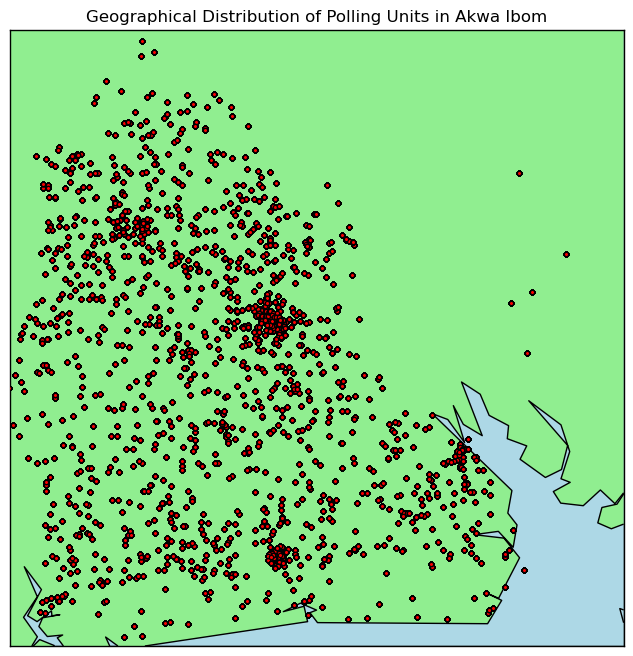

In [54]:

# Extract the latitude and longitude data
latitudes = merged_data["LATITUDE"]
longitudes = merged_data["LONGTITUDE"]

# Initialize the map
plt.figure(figsize=(10, 8))
m = Basemap(projection="merc", 
            llcrnrlat=4.5, urcrnrlat=5.5,  # lower left and upper right latitude
            llcrnrlon=7.5, urcrnrlon=8.5,  # lower left and upper right longitude
            resolution="i")

# Draw map details
m.drawcountries()
m.drawcoastlines()
m.drawmapboundary(fill_color="lightblue")
m.fillcontinents(color="lightgreen", lake_color="lightblue")

# Convert latitude and longitude to map projection coordinates
x, y = m(longitudes.values, latitudes.values)

# Plot the polling units
m.scatter(x, y, marker="o", color="red", zorder=5, s=10, edgecolor="black")

# Add title
plt.title("Geographical Distribution of Polling Units in Akwa Ibom")
plt.show()

The map above displays the geographical distribution of polling units in Akwa Ibom based on their latitude and longitude coordinates. 
Each red dot represents a polling unit.

In [56]:
akwa_ibom = merged_data

In [57]:
akwa_ibom.head()

,STATE,LGA,WARD,PU-CODE,PU-NAME,ACCREDITED_VOTERS,REGISTERED_VOTERS,RESULTS_FOUND,APC,LP,PDP,NNPP,TOTAL_VOTES,VOTER_TURNOUT,FULL ADDRESS,LATITUDE,LONGTITUDE
0,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-001,"VILLAGE SQUARE, IKOT AKWA EBOM",179,750,True,0,0,0,0,0,23.866667,"AKWA IBOM ABAK ABAK URBAN 1 VILLAGE SQUARE, IK...",5.043596,7.692120
1,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-001,"VILLAGE SQUARE, IKOT AKWA EBOM",179,750,True,0,0,0,0,0,23.866667,"AKWA IBOM ABAK ABAK URBAN 1 PRY SCH, IKOT OKU ...",23.936082,80.813183
2,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-001,"VILLAGE SQUARE, IKOT AKWA EBOM",179,750,True,0,0,0,0,0,23.866667,"AKWA IBOM ABAK ABAK URBAN 1 VILLAGE SQUARE, AT...",23.936082,80.813183
3,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-001,"VILLAGE SQUARE, IKOT AKWA EBOM",179,750,True,0,0,0,0,0,23.866667,AKWA IBOM ABAK ABAK URBAN 1 PRY SCH IBANANG ED...,4.857940,7.762043
4,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-001,"VILLAGE SQUARE, IKOT AKWA EBOM",179,750,True,0,0,0,0,0,23.866667,"AKWA IBOM ABAK ABAK URBAN 1 VILLAGE HALL, IKOT...",4.981345,7.760176


# Conclusion
The datasets offer valuable insights into the geographical distribution of polling units and the voting patterns in Akwa Ibom during the 2023 election.
Through data cleaning, analysis, and visualization, the 2023 Akwa Ibom election dataset reveals critical insights into voter turnout patterns.
To improve voter turnout in future elections, both urban and rural challenges must be addressed. Focused voter education, improved infrastructure, and optimized polling unit locations are critical to ensuring a more engaged and inclusive electoral process. The data-driven insights gathered from this analysis provide a solid foundation for strategic planning and action by election officials and stakeholders to enhance voter participation as well as improve voter engagement, particularly in areas where turnout is significantly low.

In [60]:
akwa_ibom.to_csv("NEW_AKWA IBOM_2023 Election.csv",index=False)